<a href="https://colab.research.google.com/github/PrzemyslawTrabuc/GoogleColab-files/blob/main/zad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRZEMYSŁAW TRABUĆ, V, INFORMATYKA**

In [ ]:
import pandas as pd
import numpy as np
import json
import datetime
import math
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sydney.pkl to sydney.pkl


In [ ]:
pd.set_option('display.max_rows', 100)
df = pd.read_pickle('sydney.pkl')
print(df)
#for i in range (300):
  #print(df.index[i+1],": ", df.title.iloc[i])


                                                 title  ... num_other_keywords
0         30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥  ...                  1
1        30 Minute HIIT Tabata Workout Sydney Cummings  ...                  1
2    30 Minute Abs Workout With Sydney Cummings | B...  ...                  1
3      30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥  ...                  0
4    30 Minute Workout For Beginners 🔥Burn 285 Calo...  ...                  1
..                                                 ...  ...                ...
724  40 Minute Upper Body and Cardio Finisher Worko...  ...                  1
725  40 Minute LEGS Workout! 🔥Burn 490 Calories!* 🔥...  ...                  1
726  30 Minute Sports Cardio Workout 🔥Burn 360 Calo...  ...                  2
727  20 Minute Sore Body Deep Stretch | The CHANGE ...  ...                  0
728  40 Minute Lean Legs Superset Workout🔥Burn 395 ...  ...                  2

[729 rows x 60 columns]


**Ile zazwyczaj spalano kalorii podczas filmu? (histplot)**

     length   views  ...  num_workout_types  num_other_keywords
0      31.0  197591  ...                  2                   1
1      31.0   75863  ...                  3                   1
2      32.0   60328  ...                  2                   1
3      31.0   59741  ...                  1                   0
4      31.0   18515  ...                  2                   1
..      ...     ...  ...                ...                 ...
724    43.0   23454  ...                  2                   1
725    45.0   23036  ...                  2                   1
726    34.0   21364  ...                  2                   2
727    22.0    6683  ...                  1                   0
728    45.0    8825  ...                  2                   2

[729 rows x 7 columns]


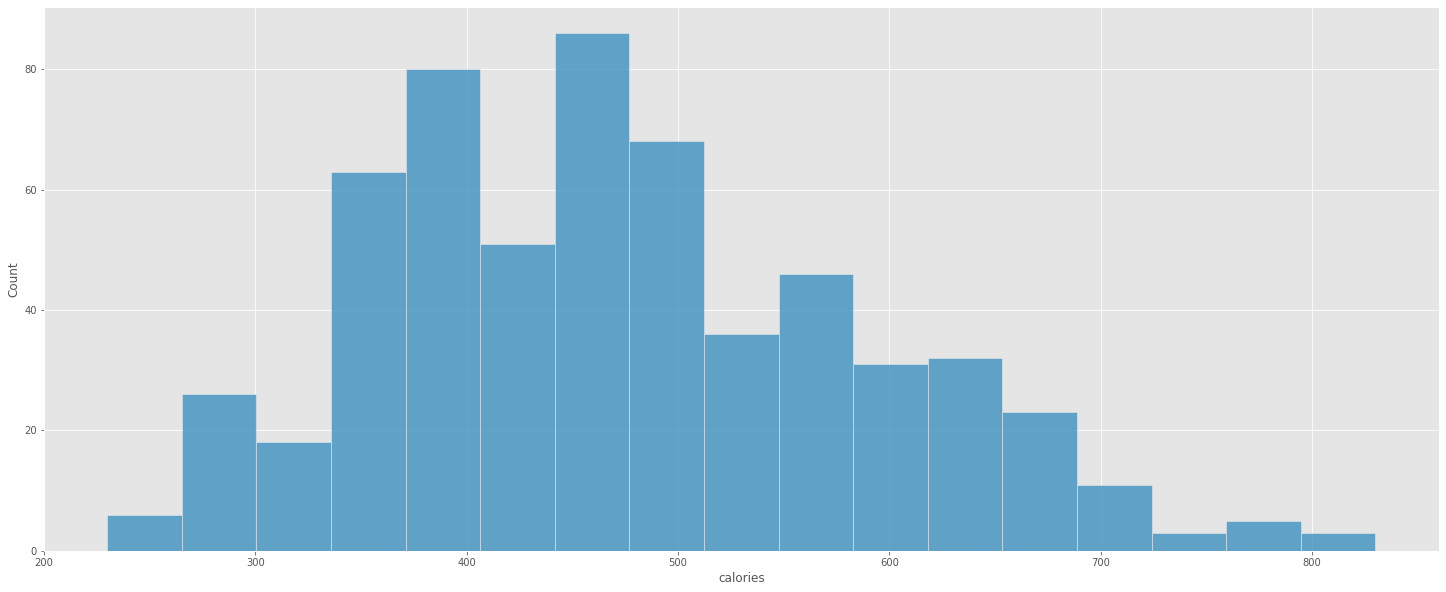

In [ ]:
pd.options.display.max_rows = 500
df_numeric = df.select_dtypes(include='number')
print(df_numeric)
plt.figure(figsize=(25,10))
sns.histplot(x="calories",
 data=df_numeric)


**ODP: Zazywczaj spalano od ok. 350 do ok. 500 kalorii**

**Na jakich obszarach ciała najczęściej koncentrują się treningi? Wymień pozycje 3, 4 i 5. (countplot)**


                                                 title  ... title_contains_superset
0         30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥  ...                   False
1        30 Minute HIIT Tabata Workout Sydney Cummings  ...                   False
2    30 Minute Abs Workout With Sydney Cummings | B...  ...                   False
3      30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥  ...                   False
4    30 Minute Workout For Beginners 🔥Burn 285 Calo...  ...                   False
..                                                 ...  ...                     ...
724  40 Minute Upper Body and Cardio Finisher Worko...  ...                   False
725  40 Minute LEGS Workout! 🔥Burn 490 Calories!* 🔥...  ...                   False
726  30 Minute Sports Cardio Workout 🔥Burn 360 Calo...  ...                   False
727  20 Minute Sore Body Deep Stretch | The CHANGE ...  ...                   False
728  40 Minute Lean Legs Superset Workout🔥Burn 395 ...  ...                 

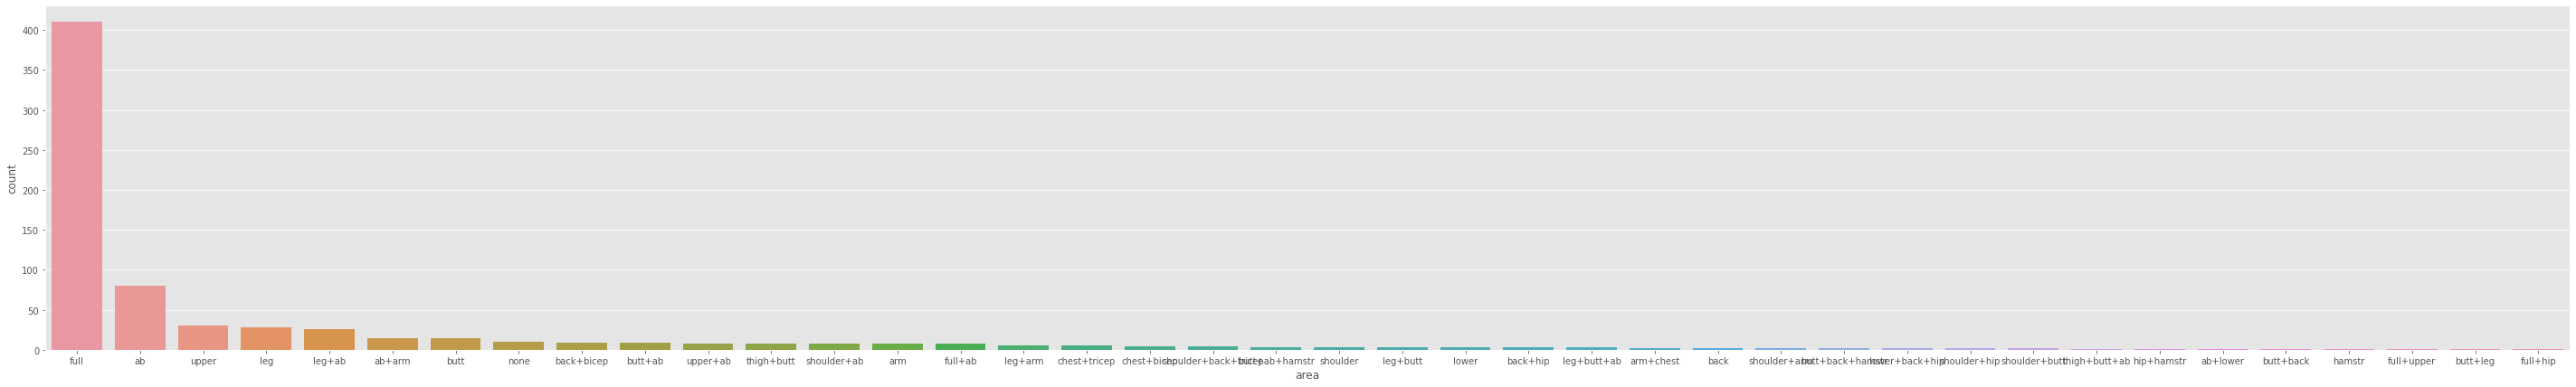

In [ ]:
pd.options.display.max_rows = 500
df_non_numeric = df.select_dtypes(exclude='number')
print(df_non_numeric)
plt.figure(figsize=(50,7))
sns.countplot(x="area", data=df_non_numeric,  order=df['area'].value_counts().index)

**ODP: Najczęstszym treningiem jest trening całego działa. Pozycje: 3 - upper, 4 - leg, 5 - leg + ab**

**Czy treningi częściej dotyczą poprawy „kardio” czy „siły”? (multiple countplots)**

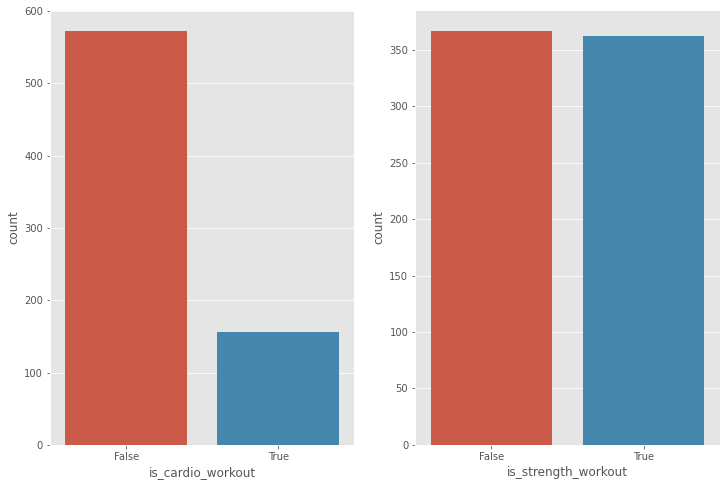

In [ ]:
def plot_multiple_countplots(df, cols):
 num_plots = len(cols)
 num_cols = math.ceil(np.sqrt(num_plots))
 num_rows = math.ceil(num_plots/num_cols)
 
 fig, axs = plt.subplots(num_rows, num_cols)
 
 for ind, col in enumerate(cols):
    i = math.floor(ind/num_cols)
    j = ind - i*num_cols
 
    if num_rows == 1:
      if num_cols == 1:
        sns.countplot(x=df[col], ax=axs)
      else:
        sns.countplot(x=df[col], ax=axs[j])
    else:
      sns.countplot(x=df[col], ax=axs[i, j])
 
 
plot_multiple_countplots(df_non_numeric, ['is_cardio_workout', 'is_strength_workout'])


**ODP: Siły**

**Czy treningi częściej dotyczą poprawy „tabaty” czy „jogi”? (multiple countplots)**


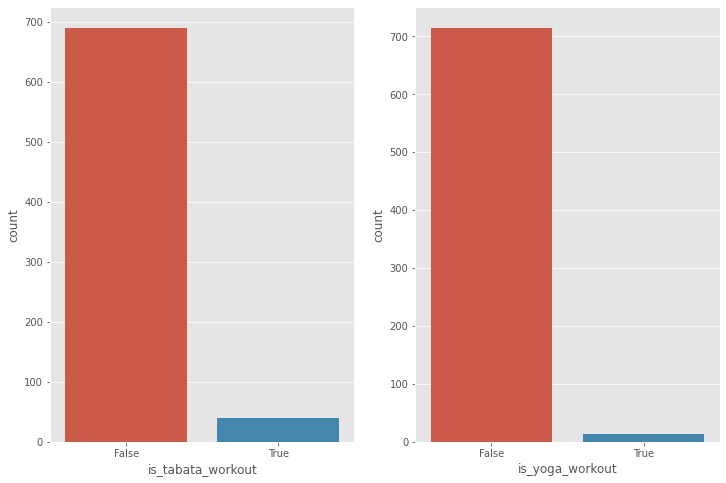

In [ ]:
def plot_multiple_countplots(df, cols):
 num_plots = len(cols)
 num_cols = math.ceil(np.sqrt(num_plots))
 num_rows = math.ceil(num_plots/num_cols)
 
 fig, axs = plt.subplots(num_rows, num_cols)
 
 for ind, col in enumerate(cols):
    i = math.floor(ind/num_cols)
    j = ind - i*num_cols
 
    if num_rows == 1:
      if num_cols == 1:
        sns.countplot(x=df[col], ax=axs)
      else:
        sns.countplot(x=df[col], ax=axs[j])
    else:
      sns.countplot(x=df[col], ax=axs[i, j])
 
 
plot_multiple_countplots(df_non_numeric, ['is_tabata_workout', 'is_yoga_workout'])

**ODP: Tabaty**

**Ile kalorii można spalić podczas najpopularniejszego filmu? (relplot)**

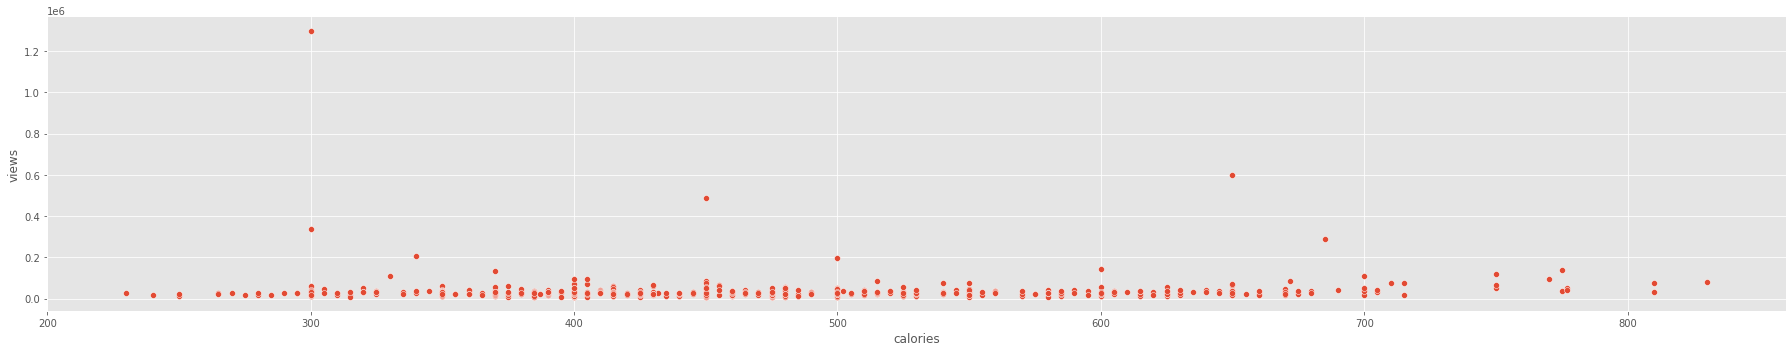

In [ ]:
msk = df['views'] > 50000
sns.relplot(x='calories', y='views', data=df, aspect=5.0)

**ODP: Najpopularniejszy film pozwala spalić ok. 300 kalorii**

**Czy liczba spalonych kalorii zależy od długości filmu? (relplot)**

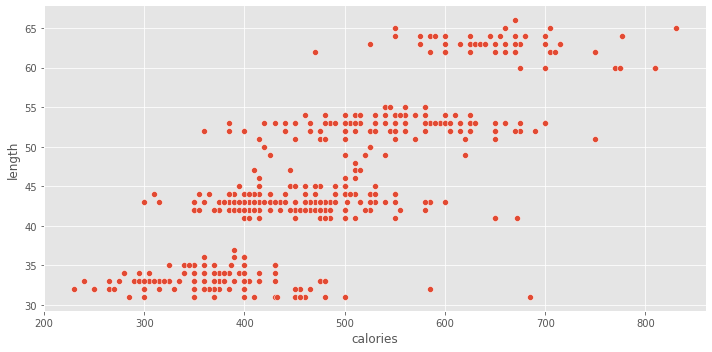

In [ ]:
sns.relplot(x='calories', y='length', data=df, aspect=2.0)

**ODP: Tak, wraz z długoscią filmu rośnie liczba spalonych kalorii**

**W którym dniu tygodnia oglądający chcą spalić najmniej, a w którym najwięcej kalorii? (boxplot/swarmplot)**


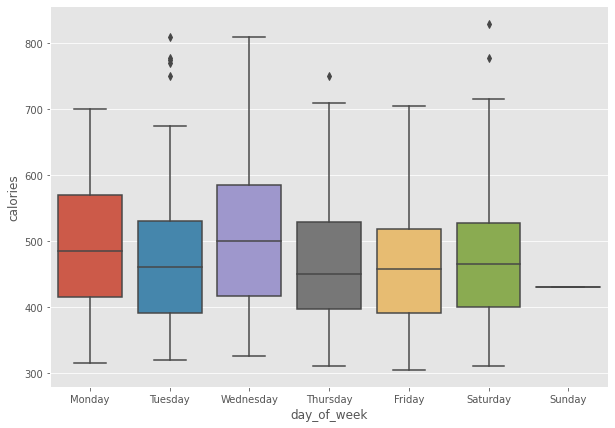

In [ ]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_num'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week_num'].replace(to_replace=to_replace)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,7))
msk = df['calories'] > 300
sns.boxplot(x="day_of_week", y="calories", data=df[msk], order=order)

**ODP: Najmniej kalorii oglądający chcą spalić w czwartek, a najwięcej w środe.**

**W które dni oglądane są najdłuższe filmy z treningami? (boxplot/swarmplot)**

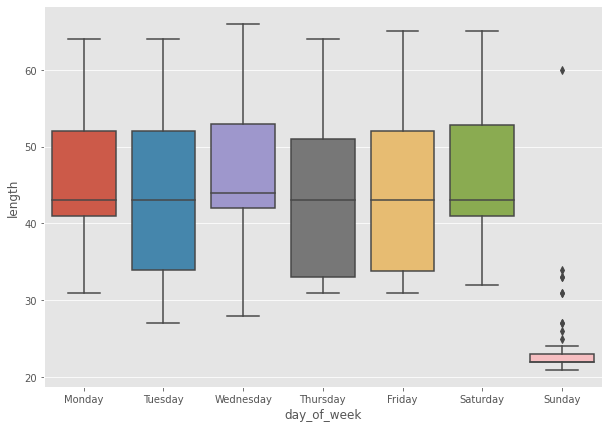

In [ ]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_num'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week_num'].replace(to_replace=to_replace)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,7))
msk = df['length'] > 20
sns.boxplot(x="day_of_week", y="length", data=df[msk], order=order)

**ODP: Najdłuższe filmy sa oglądane w poniedziałki, środy i soboty**